<a href="https://colab.research.google.com/github/arielwendichansky/DI_Bootcamp/blob/master/Week4/Day5/Daily_challenge/Complete_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -k kaggle
from google.colab import files
files.upload()

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d arnabchaki/data-science-salaries-2023

In [ ]:
! unzip 'data-science-salaries-2023.zip'

In [97]:
import pandas as pd

df = pd.read_csv('ds_salaries.csv')
print(df.head())

   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US

Task: Identify and differentiate between structured and unstructured data within the dataset, and discuss how this impacts your analysis approach.

In this dataset, I can notice that there's no unstructured data like 'comments', 'opinions' or 'other'.  The data is structured as it has a well-defined schema and organization.

The unstructured data is harder to process, analyze  and identify meaningful insights.
Furthermore, structured data is easier to store and to manipulate, while unstructured data isn't and tends to be bigger and larger.
Finally,  structured data can be easily visualized using charts, graphs, and dashboards to communicate trends and patterns effectively. Unstructured data visualization may involve techniques such as word clouds, topic modeling, or image heatmaps to present the information in a meaningful way.


In [98]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [99]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [100]:
df.describe(include='object').T

,count,unique,top,freq
experience_level,3755,4,SE,2516
employment_type,3755,4,FT,3718
job_title,3755,93,Data Engineer,1040
salary_currency,3755,20,USD,3224
employee_residence,3755,78,US,3004
company_location,3755,72,US,3040
company_size,3755,3,M,3153


In [101]:
#Cleaning duplicated values
print(len(df))
print(df.duplicated().sum())
df = df.drop_duplicates()
print(len(df))
print(df.duplicated().sum())

3755
1171
2584
0


In [102]:
missing_values = df.isnull()
print(missing_values.sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


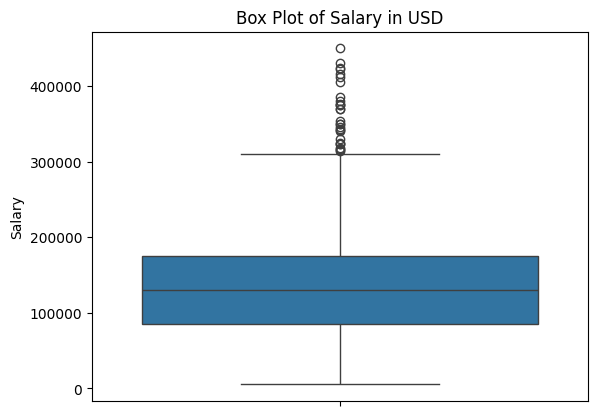

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of salary through box plot
sns.boxplot(data=df,y='salary_in_usd')
plt.ylabel('Salary')
plt.title('Box Plot of Salary in USD')
plt.show()

In [104]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
# Defining lower bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Getting clean data
df = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]

In [ ]:
print(df[(df['experience_level']== 'EX') & (df['work_year']== 2020)])

In [105]:
experience_level= df.groupby('experience_level')['salary_in_usd'].agg(['mean','median'])
experience_level_median_sorted = experience_level.sort_values(by='median')
experience_level_mean_sorted = experience_level.sort_values(by='median')
print(experience_level)

                           mean    median
experience_level                         
EN                 72648.685185   61900.0
EX                180907.866667  181080.0
MI                 99955.068182   95000.0
SE                151322.684691  147100.0


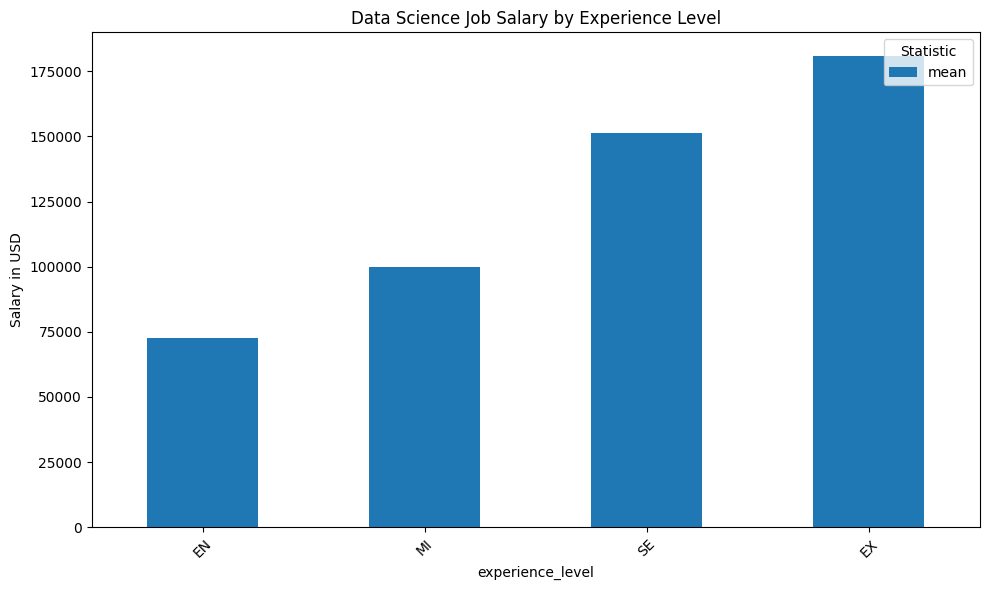

In [106]:
# Create a stacked bar plot
experience_level_mean_sorted['mean'].plot(kind='bar', figsize=(10, 6), stacked=True)

# Set labels and title
plt.xlabel('experience_level')
plt.ylabel('Salary in USD')
plt.title('Data Science Job Salary by Experience Level')

# Display legend
plt.legend(title='Statistic', loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and display plot
plt.tight_layout()
plt.show()


It can be seen that the salary difference between an entry-level employee and an expert one is on average U$S 100.000 more, based on the data provided from 2020 to 2023.

In [ ]:
experience_level_year = df.groupby(['work_year', 'experience_level'])['salary_in_usd'].agg(['mean', 'median']).reset_index()
print(experience_level)

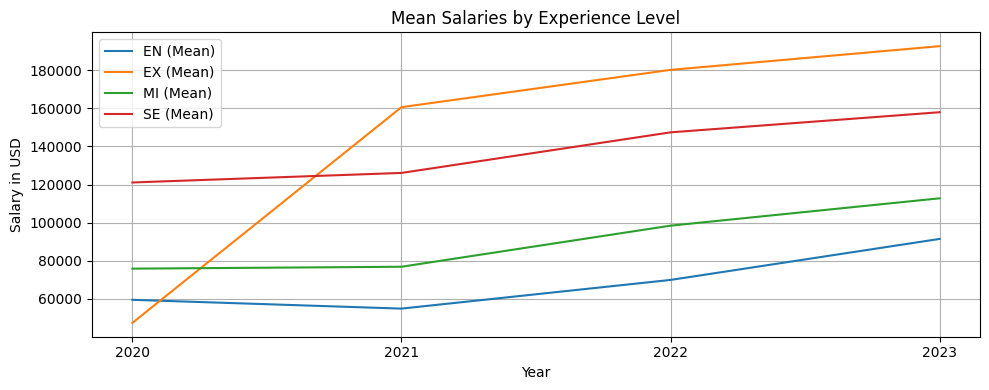

In [109]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator


plt.figure(figsize=(10, 4))

for level in experience_level_year['experience_level'].unique():
    data = experience_level_year[experience_level_year['experience_level'] == level]
    plt.plot(data['work_year'], data['mean'], label=f'{level} (Mean)')

plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.title('Mean Salaries by Experience Level')
plt.legend()
plt.grid(True)

# Set integer ticks on x-axis
plt.gca().xaxis.set_major_locator(FixedLocator(experience_level_year['work_year'].unique()))

plt.tight_layout()
plt.show()

From 2021 for every employee with different the annual salary has increased. But, from 2020 to 2021 there was a decreese for the entry-level one.

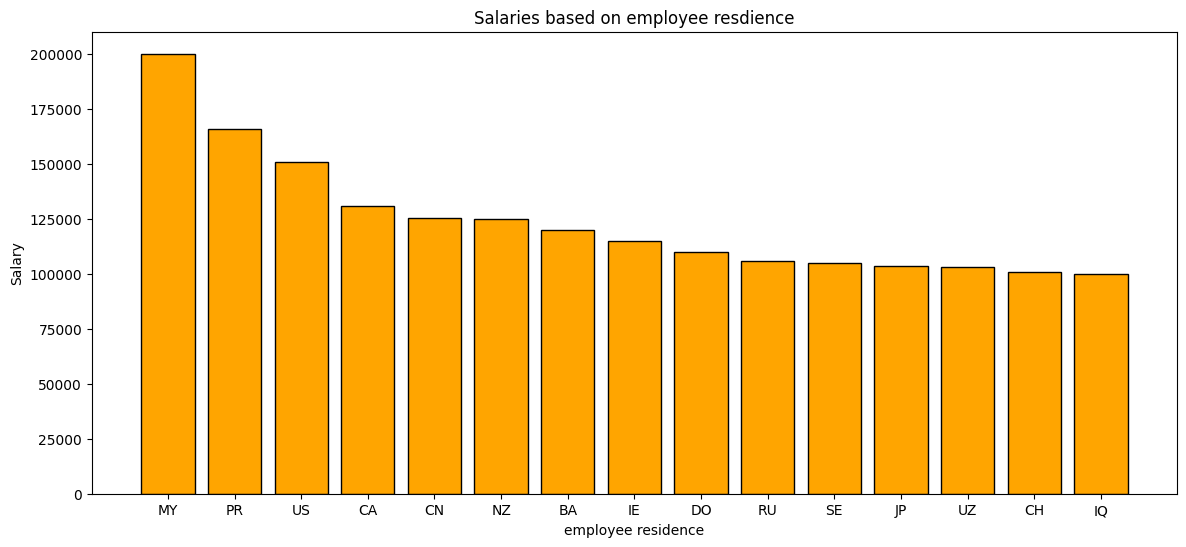

In [111]:
# plotting the salary based on employee residence
employee_residence=df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(14,6))
plt.bar(employee_residence.index,employee_residence,color='orange',edgecolor='black')
plt.title("Salaries based on employee resdience")
plt.xlabel('employee residence')
plt.ylabel('Salary')
plt.show()

Those developers based in Malaysia are the ones with the highest salary